<a href="https://colab.research.google.com/github/yoshinaga2904/Bootcamp-Alura/blob/main/Fabio_Yoshinaga_Projeto_modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Apresentação:

---
Olá Cientistas!

Pretendo com as aulas do modulo 1 - Bootcamp Data Science Aplicado, aprender as tecnicas utilizadas por um cientista de dados para os tratamentos de dados e teorias aplicadas. Vou analisar os dados da fonte citada abaixo e demonstrar algumas hipóteses observadas referente a epidemia Covid 19. Então vamos lá... 


# Base de estudo:

---
Pesquisa:

Secretarias de Saúde das Unidades Federativas, dados tratados por Álvaro Justen e colaboradores/Brasil.IO.

*fonte: https://github.com/turicas/covid19-br/blob/master/api.md#casos*


# Hipótese:

####1 - analisar quantidade de casos Registrados de covid 19 por estados UF;

####2 - analisar quantidade de casos confirmados de covid 19 por estados UF; 

####3 - analisar quantidade de mortes pela covid 19 por estados UF; 

####4 - analisar taxa de mortalidade pela covid 19 por estados UF;

######4.1 - analisar taxa de mortalidade pela covid 19 por estados UF, e verificar de quantas pessoas confirmadas, quantas pessoas morrem;

####5 - analisar quantidade de casos confirmados pelo covid 19, com a estimativa populacional segundo o IBGE por estados UF; 

####6 - analisar quantidade de mortes pelo covid 19, com a estimativa populacional segundo o IBGE por estados UF

# Bibliotecas:


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Análise dos Dados: 

# Documentação da tabela:
## Colunas:

1. date: data de coleta dos dados no formato YYYY-MM-DD.

2. state: sigla da unidade federativa, exemplo: SP.

3. city: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).

4. place_type: tipo de local que esse registro descreve, pode ser city ou state.

5. order_for_place: número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.

6. is_last: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).

7. city_ibge_code: código IBGE do local.

8. confirmed: número de casos confirmados.

9. deaths: número de mortes.

10. estimated_population: população estimada para esse município/estado em 2020, segundo o IBGE. (acesse o script que faz o download e conversão dos dados de população).

11. estimated_population_2019: população estimada para esse município/estado em 2019, segundo o IBGE. ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.

12. confirmed_per_100k_inhabitants: número de casos 
confirmados por 100.000 habitantes (baseado em estimated_population).

13. death_rate: taxa de mortalidade (mortes / confirmados).

#Arquivo - Brasil IO

In [4]:
#lendo arquivo do Brasil.IO
caso_brasil_io = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bootcamp Alura Data Science/caso.csv')
caso_brasil_io.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


In [5]:
#Verificando quantidade de linhas e colunas no arquivo Brasil.IO
caso_brasil_io.shape
print(f'Temos no arquivo de dados do Brasil IO um total de {caso_brasil_io.shape[0]} linhas e {caso_brasil_io.shape[1]} colunas')

Temos no arquivo de dados do Brasil IO um total de 936870 linhas e 13 colunas


In [6]:
#informações gerais e tipo de variáveis no arquivo Brasil.IO
caso_brasil_io.info()
print('Existem campos com valores vazios, e a princípio não farei nenhum tratamento, para os dados vazios. Conforme a necessidade traterei no decorrer da análise.')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            936870 non-null  object 
 1   state                           936870 non-null  object 
 2   city                            930535 non-null  object 
 3   place_type                      936870 non-null  object 
 4   confirmed                       936870 non-null  int64  
 5   deaths                          936870 non-null  int64  
 6   order_for_place                 936870 non-null  int64  
 7   is_last                         936870 non-null  bool   
 8   estimated_population_2019       933215 non-null  float64
 9   estimated_population            933215 non-null  float64
 10  city_ibge_code                  933215 non-null  float64
 11  confirmed_per_100k_inhabitants  919888 non-null  float64
 12  death_rate      

# 1 - analisar quantidade de casos Registrados de covid 19 por estados UF;

In [7]:
#Separando a quantidade de registros para casos de covid 19 por estados UF
frequencia = caso_brasil_io['state'].value_counts()

#Verificando o percentual de registros dos casos de covid 19 por estados UF
percentual = caso_brasil_io['state'].value_counts(normalize=True).round(4)*100

#Criando um DataFrame com os valores de frequência e percentual dos casos por estados UF
dados = {'Frequência de casos Registrados':frequencia, 'Porcentagem %':percentual}
casos_registrados = pd.DataFrame(data=dados)
casos_registrados

,Frequência de casos Registrados,Porcentagem %
MG,129839,13.86
SP,114897,12.26
RS,80731,8.62
BA,72566,7.75
PR,62364,6.66
SC,53179,5.68
GO,41065,4.38
MA,41062,4.38
PB,38848,4.15
PI,38160,4.07


<function matplotlib.pyplot.show>

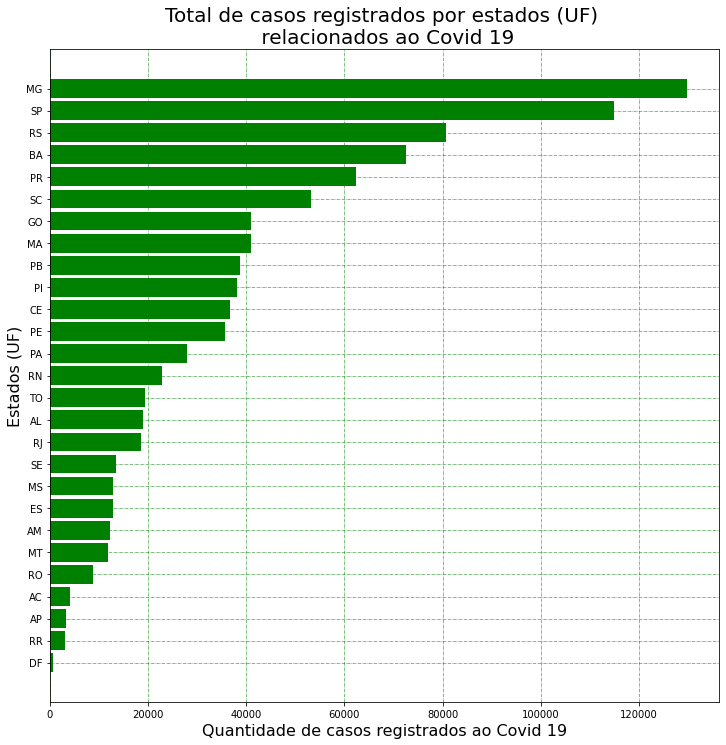

In [8]:
#Criando um gráfico
plt.figure(figsize=(12, 12))

#armazenando valores de frequências para construir o gráfico - eixo x
casos_registrados.sort_values(by='Frequência de casos Registrados', ascending=True, inplace=True)
frequencia = casos_registrados['Frequência de casos Registrados']

#armazenando valores dos estados UF para construir o gráfico - eixo y
UF = casos_registrados.index

#Chamando método barh do matplotlib, para construir o gráfico de barras horizontais
plt.barh(UF, frequencia, height=0.85, color='green')

#Criando um título
plt.title('Total de casos registrados por estados (UF) \n relacionados ao Covid 19', fontsize = 20)

#Nomeando o eixo y
plt.ylabel('Estados (UF)', fontsize = 16)

#Nomeando o eixo x
plt.xlabel('Quantidade de casos registrados ao Covid 19', fontsize = 16)

#grid para orientação
plt.grid(color='g', linestyle='-.', linewidth=0.5)

plt.show

Os dados apresentam que a Unidade da Federação com maior frequência é o estado de Minas Gerais com 129.839 registros representando um percentual de 13.86% dos registros realizados em todo o pais, para casos de Covid 19. Interessante que Minas Gerais é o segundo estado mais populoso do pais, com 21.292.666 habitantes segundo dados do IBGE em 2020. São Paulo que é o estado mais populoso do pais com 46.289.333 habitantes segundo o IBGE em 2020, ficou em segundo lugar nos casos registrados referente ao Covid 19.
Existem diversos fatores que contribuem para isso, desde cuidados preventivos que a população adotou, histórico hospitalar, idade da população, aspectos culturais, regionais, miscigenação racial, e diversos outros fatores. 

# 2 - analisar quantidade de casos confirmados de covid 19 por estados UF;

In [9]:
#Filtrando dados por estados UF
caso_brasil_io.query('place_type == "state" & is_last == True', inplace=True)

#quantidade de casos confirmados por estados UF
casos_confirmados = caso_brasil_io[['state','confirmed']]

#agrupando por estados UF e fazendo o somatório dos casos confirmados
casos_confirmados = casos_confirmados.groupby(by=['state']).sum()

#ordenando os estados UF pela quantidade de casos confirmados em ordem decrescente 
casos_confirmados = casos_confirmados.sort_values(by=['confirmed'], ascending=False)

#criando um index e resetando o index state
casos_confirmados.reset_index(inplace=True)

#criando coluna com o percentual dos casos confirmados
casos_confirmados['Porcentagem %'] = (casos_confirmados['confirmed']/casos_confirmados['confirmed'].sum()*100).round(2)

casos_confirmados

,state,confirmed,Porcentagem %
0,SP,1125936,20.05
1,MG,364541,6.49
2,BA,359130,6.39
3,RJ,313843,5.59
4,CE,277072,4.93
5,SC,268644,4.78
6,GO,260133,4.63
7,PA,256139,4.56
8,RS,254828,4.54
9,PR,217175,3.87


<function matplotlib.pyplot.show>

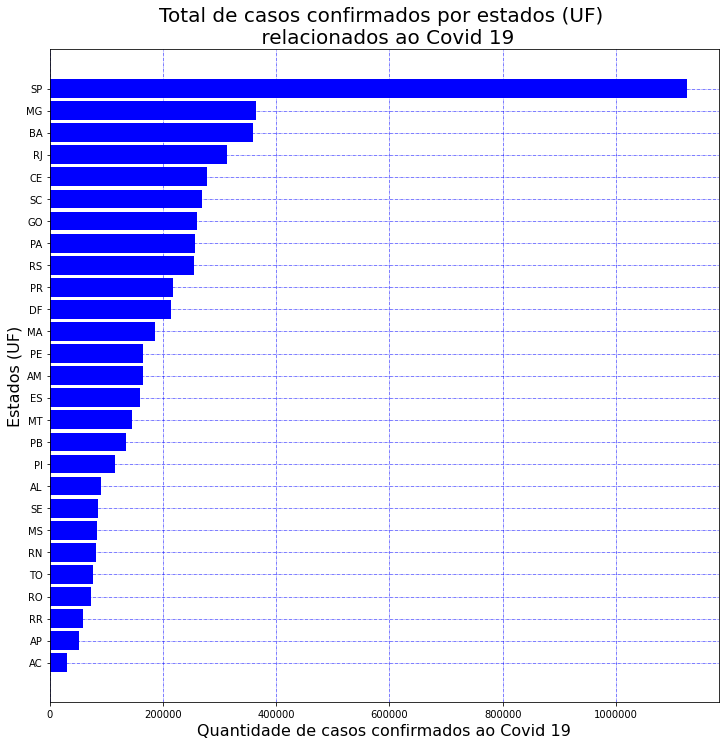

In [10]:
#Criando um gráfico
plt.figure(figsize=(12, 12))

#armazenando quantidade de confirmados para construir o gráfico - eixo x
casos_confirmados.sort_values(by='confirmed', ascending=True, inplace=True)
confirmados = casos_confirmados['confirmed']

#armazenando valores dos estados UF para construir o gráfico - eixo y
UF = casos_confirmados['state']

#Chamando método barh do matplotlib, para construir o gráfico de barras horizontais
plt.barh(UF, confirmados, height=0.85, color='blue')


#Criando um título
plt.title('Total de casos confirmados por estados (UF) \n relacionados ao Covid 19', fontsize = 20)

#Nomeando o eixo y
plt.ylabel('Estados (UF)', fontsize = 16)

#Nomeando o eixo x
plt.xlabel('Quantidade de casos confirmados ao Covid 19', fontsize = 16 )

#formatando eixo x do gráfico
plt.ticklabel_format(axis = 'x' , style = 'plain')

#grid para orientação
plt.grid(color='b', linestyle='-.', linewidth=0.5)

plt.show

São Paulo é dispararo o estado (UF) com mais casos confirmados de Covid 19, ocorreram 1.125.936 registros. Representando cerca de 20.05% de todos os casos confirmados em todo pais. 

# 3 - analisar quantidade de mortes pela covid 19 por estados UF;

In [11]:
#quantidade de mortes por estados UF
mortes = caso_brasil_io[['state','deaths']]

#agrupando por estados UF e fazendo o somatório das mortes
mortes = mortes.groupby(by=['state']).sum()

#ordenando os estados UF pela quantidade de mortes em ordem decrescente 
mortes = mortes.sort_values(by=['deaths'], ascending=False)

#criando um index e resetando o index state
mortes.reset_index(inplace=True)

#criando coluna com o percentual dos mortes
mortes['Porcentagem %'] = (mortes['deaths']/mortes['deaths'].sum()*100).round(2)

mortes

,state,deaths,Porcentagem %
0,SP,39717,24.54
1,RJ,20849,12.88
2,CE,9392,5.80
3,MG,9128,5.64
4,PE,8687,5.37
5,BA,7731,4.78
6,PA,6779,4.19
7,RS,5954,3.68
8,GO,5869,3.63
9,PR,5293,3.27


<function matplotlib.pyplot.show>

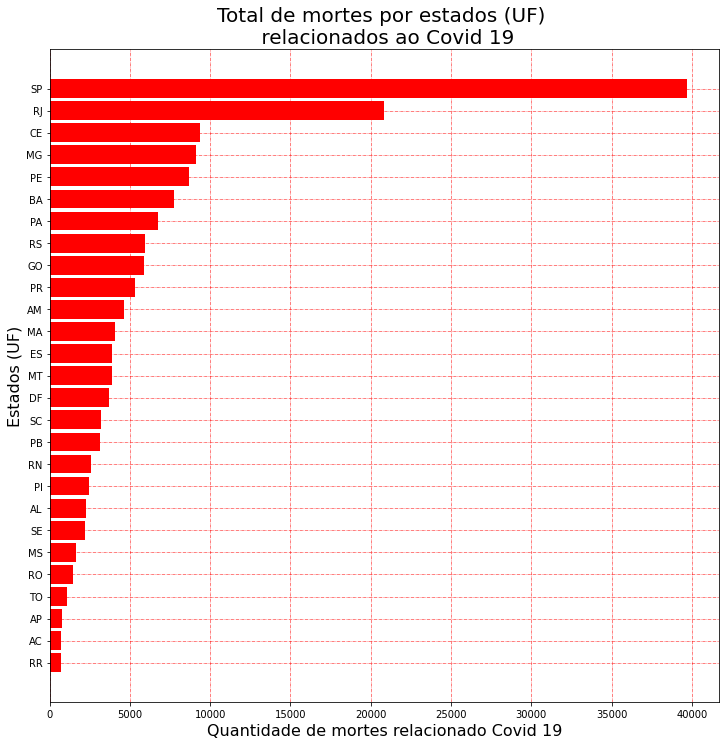

In [12]:
#Criando um gráfico
plt.figure(figsize=(12, 12))

#armazenando quantidade de mortes para construir o gráfico - eixo x
mortes.sort_values(by='deaths', ascending=True, inplace=True)
mortos = mortes['deaths']

#armazenando valores dos estados UF para construir o gráfico - eixo y
UF = mortes['state']

#Chamando método barh do matplotlib, para construir o gráfico de barras horizontais
plt.barh(UF, mortos, height=0.85, color='red')


#Criando um título
plt.title('Total de mortes por estados (UF) \n relacionados ao Covid 19', fontsize = 20)

#Nomeando o eixo y
plt.ylabel('Estados (UF)', fontsize = 16)

#Nomeando o eixo x
plt.xlabel('Quantidade de mortes relacionado Covid 19', fontsize = 16 )

#formatando eixo x do gráfico
plt.ticklabel_format(axis = 'x' , style = 'plain')

#grid para orientação
plt.grid(color='r', linestyle='-.', linewidth=0.5)

plt.show

São Paulo é o estado com maior número de casos de mortes com cerca de 39.717 mortos, representando um percentual de 24.54% em todo o pais.  

# 4 - analisar taxa de mortalidade pela covid 19 por estados UF;

In [34]:
#Separando variaveis de estudo para analisar a mortalidade, state, deaths, confirmed
mortalidade = caso_brasil_io[['state','deaths', 'confirmed']]

#agrupando por estado UF, e realizando o somatório de cada variavel 
mortalidade = mortalidade.groupby(by=['state']).sum()

#Criando uma coluna(variavel) de taxa de mortalidade, pegando o total por estado UF do total de mortos
# e dividindo pelo total de casos confirmados. 
mortalidade['death_rate'] = (mortalidade['deaths']/mortalidade['confirmed']*100).round(2)

#Ordenando o DataFrame pelo total de taxa de mortalidade(death_rate)
mortalidade = mortalidade.sort_values(by=['death_rate'], ascending=False)

#criando um index e resetando o index state
mortalidade.reset_index(inplace=True)

mortalidade

,state,deaths,confirmed,death_rate
0,RJ,20849,313843,6.64
1,PE,8687,164222,5.29
2,SP,39717,1125936,3.53
3,CE,9392,277072,3.39
4,RN,2603,82420,3.16
5,AM,4607,164070,2.81
6,MT,3896,145644,2.68
7,PA,6779,256139,2.65
8,SE,2231,84810,2.63
9,MG,9128,364541,2.50


<function matplotlib.pyplot.show>

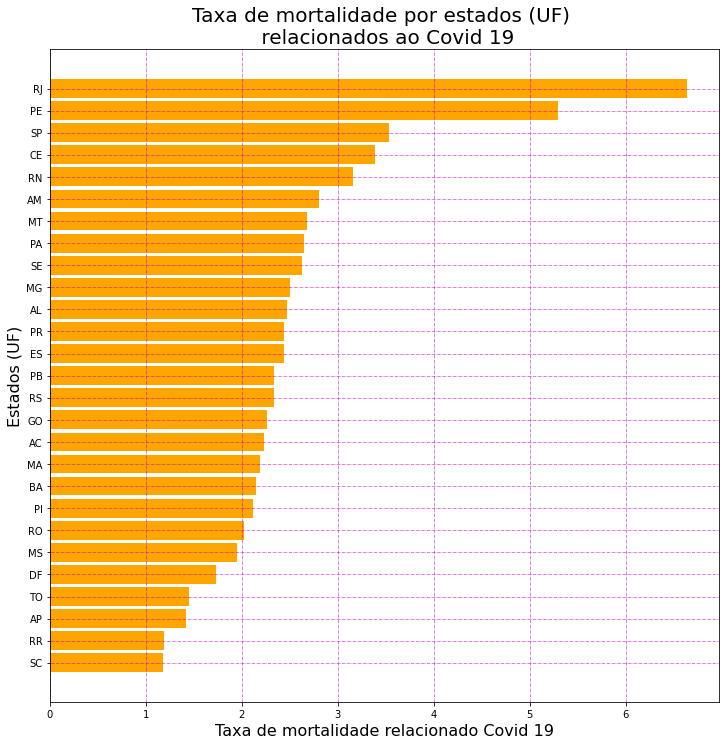

In [62]:
#Criando um gráfico
plt.figure(figsize=(12, 12))

#armazenando a taxa de mortalidade para construir o gráfico - eixo x
mortalidade.sort_values(by='death_rate', ascending=True, inplace=True)
tx_mortos = mortalidade['death_rate']

#armazenando valores dos estados UF para construir o gráfico - eixo y
UF = mortalidade['state']

#Chamando método barh do matplotlib, para construir o gráfico de barras horizontais
plt.barh(UF, tx_mortos, height=0.85, color='orange')


#Criando um título
plt.title('Taxa de mortalidade por estados (UF) \n relacionados ao Covid 19', fontsize = 20)

#Nomeando o eixo y
plt.ylabel('Estados (UF)', fontsize = 16)

#Nomeando o eixo x
plt.xlabel('Taxa de mortalidade relacionado Covid 19', fontsize = 16 )

#formatando eixo x do gráfico
plt.ticklabel_format(axis = 'x' , style = 'plain')

#grid para orientação
plt.grid(color='m', linestyle='-.', linewidth=0.5)

plt.show

Os estados UF do Rio de Janeiro e Pernambuco destacam pela alta taxa de mortalidade em relação aos outros estados do pais, apresentam uma taxa de mortalidade de 6.64% e 5.29% respectivamente. Existem diversos fatores que contribuem negativamente e causam esta alta taxa de mortalidade, como condições financeiras do estado, política, cultura, e principalmente as condições hospitalares.

# 4.1 - analisar taxa de mortalidade pela covid 19 por estados UF, e verificar de quantas pessoas confirmadas, quantas pessoas morrem;

In [77]:
#Criando a coluna de confirmados / mortes
mortalidade['confirmed / deaths'] = (mortalidade['confirmed']/mortalidade['deaths']).round()

#Ordenando o DataFrame pela coluna confirmados / mortes
mortalidade = mortalidade.sort_values(by=['confirmed / deaths'], ascending=False)

#Ordenando o index para cada quantidade de pessoas confirmadas, uma pessoa morre.
mortalidade.reset_index(drop=True, inplace=True)

mortalidade

,state,deaths,confirmed,death_rate,confirmed / deaths
0,SC,3173,268644,1.18,85.0
1,RR,695,58304,1.19,84.0
2,AP,751,52832,1.42,70.0
3,TO,1108,76175,1.45,69.0
4,DF,3728,214955,1.73,58.0
5,MS,1629,83616,1.95,51.0
6,RO,1470,72630,2.02,49.0
7,PI,2459,115825,2.12,47.0
8,BA,7731,359130,2.15,46.0
9,MA,4101,186904,2.19,46.0


<function matplotlib.pyplot.show>

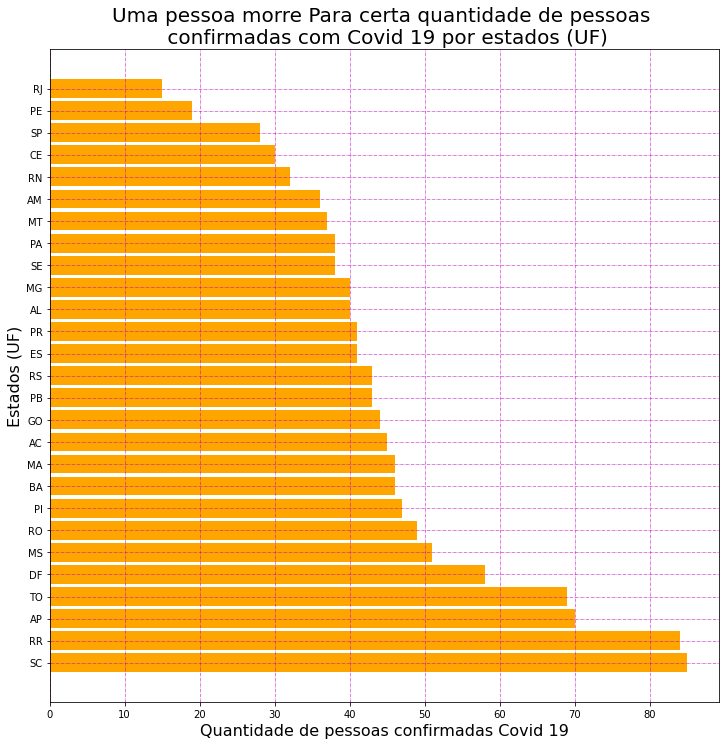

In [92]:
#Criando um gráfico
plt.figure(figsize=(12, 12))

#armazenando a taxa de mortalidade para construir o gráfico - eixo x
mortalidade.sort_values(by='confirmed / deaths', ascending=False, inplace=True)
confirmados_mortes = mortalidade['confirmed / deaths']

#armazenando valores dos estados UF para construir o gráfico - eixo y
UF = mortalidade['state']

#Chamando método barh do matplotlib, para construir o gráfico de barras horizontais
plt.barh(UF, confirmados_mortes, height=0.85, color='orange')


#Criando um título
plt.title('Uma pessoa morre Para certa quantidade de pessoas \n confirmadas com Covid 19 por estados (UF)', fontsize = 20)

#Nomeando o eixo y
plt.ylabel('Estados (UF)', fontsize = 16)

#Nomeando o eixo x
plt.xlabel('Quantidade de pessoas confirmadas Covid 19', fontsize = 16 )

#formatando eixo x do gráfico
plt.ticklabel_format(axis = 'x' , style = 'plain')

#grid para orientação
plt.grid(color='m', linestyle='-.', linewidth=0.5)

plt.show

Seguindo o mesmo raciocínio referente a apresentação da taxa de mortalidade, o gráfico acima apresenta que uma pessoa morre em relação a certa quantidade de pessoas confirmadas com Covid 19. 

O estado do Rio de Janeiro é o pior caso onde para cada 15 pessoas confirmadas, 1 morre de Covid 19. 

Santa Catarina apresenta o melhor cenário do pais, onde para cada 85 pessoas confirmadas, 1 morre de Covid 19.

# 5 - analisar quantidade de casos confirmados pelo covid 19, com a estimativa populacional segundo o IBGE por estados UF;

In [106]:
#Filtrando dados por estados UF
caso_brasil_io.query('place_type == "state" & is_last == True', inplace=True)

#quantidade de casos confirmados por estados UF
casos_confirmados = caso_brasil_io[['state','confirmed', 'estimated_population']]

#Ordenando pela estimativa populacional segundo o IBGE
casos_confirmados = casos_confirmados.sort_values(by=['estimated_population'], ascending=False)

#Porcentagem em relação a estimativa populacional com o numero de casos confirmados
casos_confirmados['porcentagem %'] = (casos_confirmados['confirmed']/
                                      casos_confirmados['estimated_population']*100).round()

#Ordenando o index
casos_confirmados = casos_confirmados.reset_index(drop=True)

casos_confirmados



,state,confirmed,estimated_population,porcentagem %
0,SP,1125936,46289333.0,2.0
1,MG,364541,21292666.0,2.0
2,RJ,313843,17366189.0,2.0
3,BA,359130,14930634.0,2.0
4,PR,217175,11516840.0,2.0
5,RS,254828,11422973.0,2.0
6,PE,164222,9616621.0,2.0
7,CE,277072,9187103.0,3.0
8,PA,256139,8690745.0,3.0
9,SC,268644,7252502.0,4.0


<function matplotlib.pyplot.show>

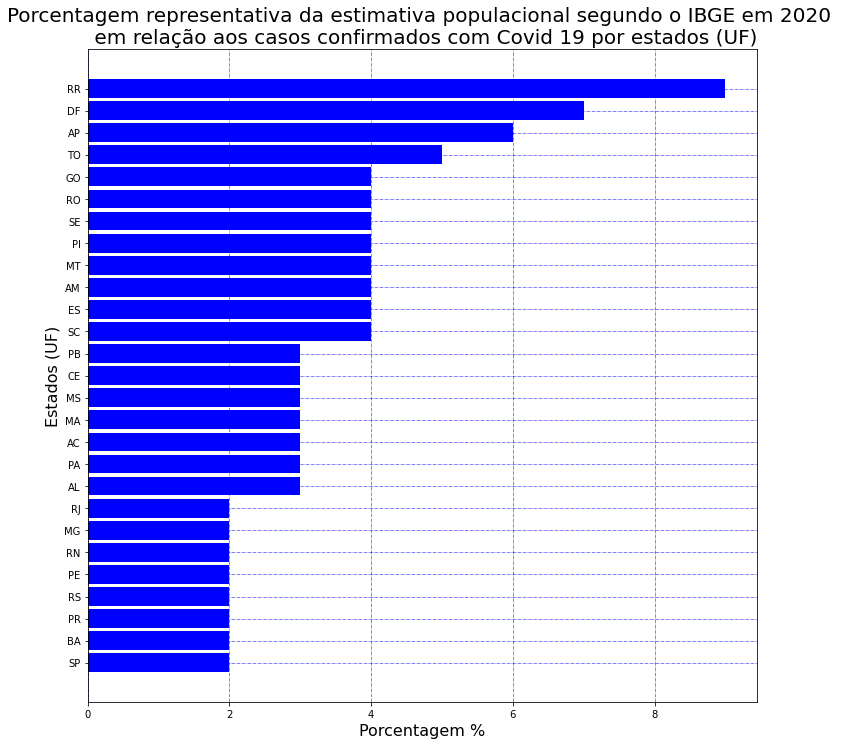

In [111]:
#Criando um gráfico
plt.figure(figsize=(12, 12))

#armazenando a taxa de mortalidade para construir o gráfico - eixo x
casos_confirmados.sort_values(by='porcentagem %', ascending=True, inplace=True)
tx_confirmados_populacao = casos_confirmados['porcentagem %']

#armazenando valores dos estados UF para construir o gráfico - eixo y
UF = casos_confirmados['state']

#Chamando método barh do matplotlib, para construir o gráfico de barras horizontais
plt.barh(UF, tx_confirmados_populacao, height=0.85, color='blue')


#Criando um título
plt.title('Porcentagem representativa da estimativa populacional segundo o IBGE em 2020 \n em relação aos casos confirmados com Covid 19 por estados (UF)', fontsize = 20)

#Nomeando o eixo y
plt.ylabel('Estados (UF)', fontsize = 16)

#Nomeando o eixo x
plt.xlabel('Porcentagem %', fontsize = 16 )

#formatando eixo x do gráfico
plt.ticklabel_format(axis = 'x' , style = 'plain')

#grid para orientação
plt.grid(color='b', linestyle='-.', linewidth=0.5)

plt.show